## EDA 과정
#### 적절한 머신러닝 선택

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.datasets import load_iris

In [44]:
data = load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [45]:
X = data.data
Y = data.target
iris_class = data.target_names # feature_names
X.shape, Y.shape

((150, 4), (150,))

In [46]:
iris_column = data.feature_names
iris_column

# sepal length (cm)  꽃받침
# petal length (cm)  꽃잎

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 각 꽃잎의 평균 길이와 꽃받침의 평균 길이

In [47]:
sum_sepal_length = sum([iris[0] for iris in X]) # 1번째 열 ('sepal length (cm)') 의 합 출력
sum_petal_length = sum([iris[2] for iris in X]) # 3번째 열 ('petal length (cm)') 의 합 출력
sum_sepal_length, sum_petal_length

(876.5000000000002, 563.7000000000004)

In [48]:
mean_sepal_length = round(np.mean([iris[0] for iris in X]), 3)
mean_petal_length = round(np.mean([iris[2] for iris in X]), 3)
mean_sepal_length, mean_petal_length

(5.843, 3.758)

## 붓꽃의 품종별 특징

### 품종별로 데이터 분류

In [49]:
iris_class # (0, 1, 2)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
iris_column

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
X[0], Y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [52]:
setosa = X[Y==0]      # Y=0, 즉 Y가 True인 값 추출
versicolor = X[Y==1]
virginica = X[Y==2]

In [53]:
plt.style.use('ggplot') # R에 있는 시각화 도구를 흉내내어 좀 더 깔끔한 출력을 보여줌
setosa_len = len(setosa)
versicolor_len = len(versicolor)
virginica_len = len(virginica)

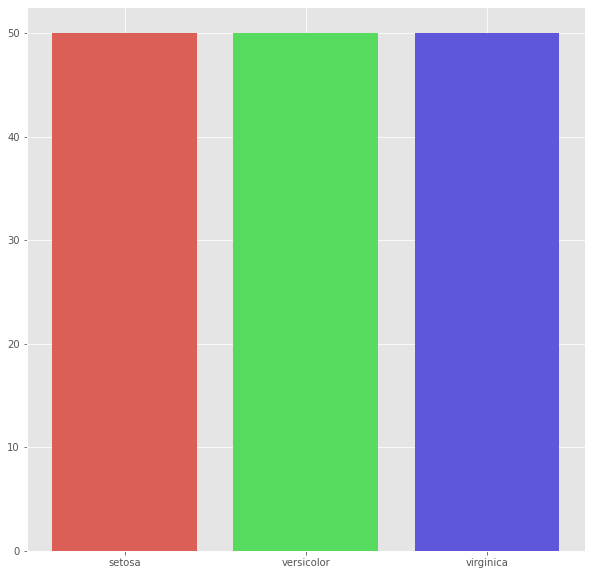

In [54]:
plt.figure(figsize=(10,10))
species_count = [setosa_len, versicolor_len, virginica_len]
color = sns.color_palette('hls', len(species_count))
plt.bar(iris_class, species_count, color=color)
plt.show()

각각의 샘플 개수가 같은 iris 데이터이기 때문에 개수에 대한 시각화는 의미가 없음

### 길이와 넓이의 시각화

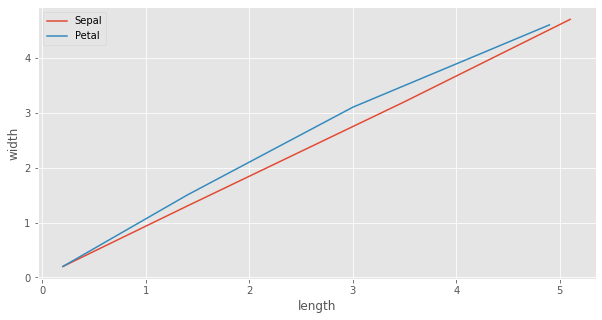

In [55]:
plt.figure(figsize=(10,5))
plt.plot(X[0], X[2]) # length
plt.plot(X[1], X[3]) # width
plt.xlabel('length')
plt.ylabel('width')
plt.legend(['Sepal', 'Petal'])
plt.show()

### 길이와 넓이의 상관관계

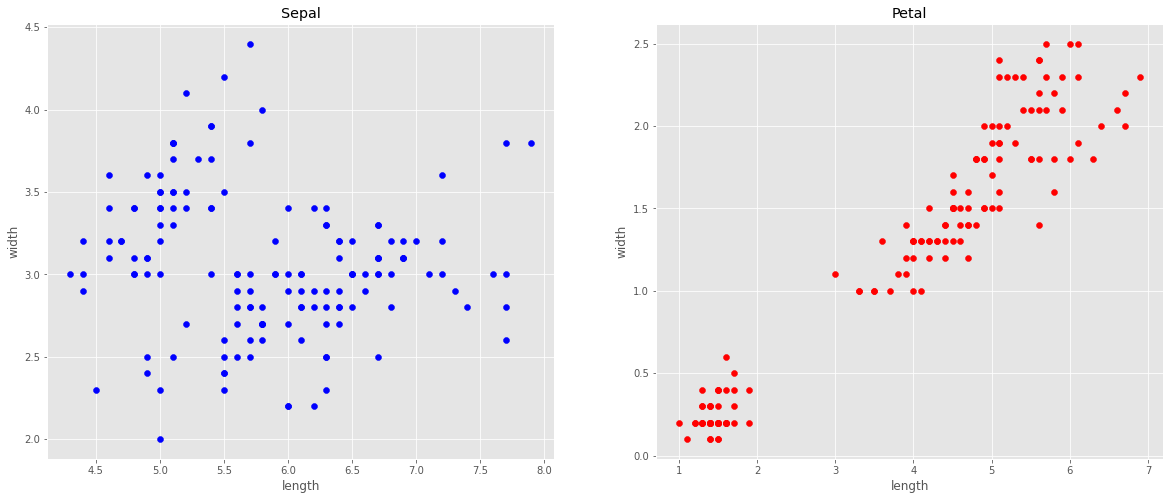

In [56]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter([iris[0] for iris in X], [iris[1] for iris in X], color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter([iris[2] for iris in X], [iris[3] for iris in X], color='r')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Petal')

plt.show()

규칙성은 없으나, 꽃잎의 길이와 너비의 비례한다. 즉 상관관계가 있다는 것을 명확하게 알 수 있다.

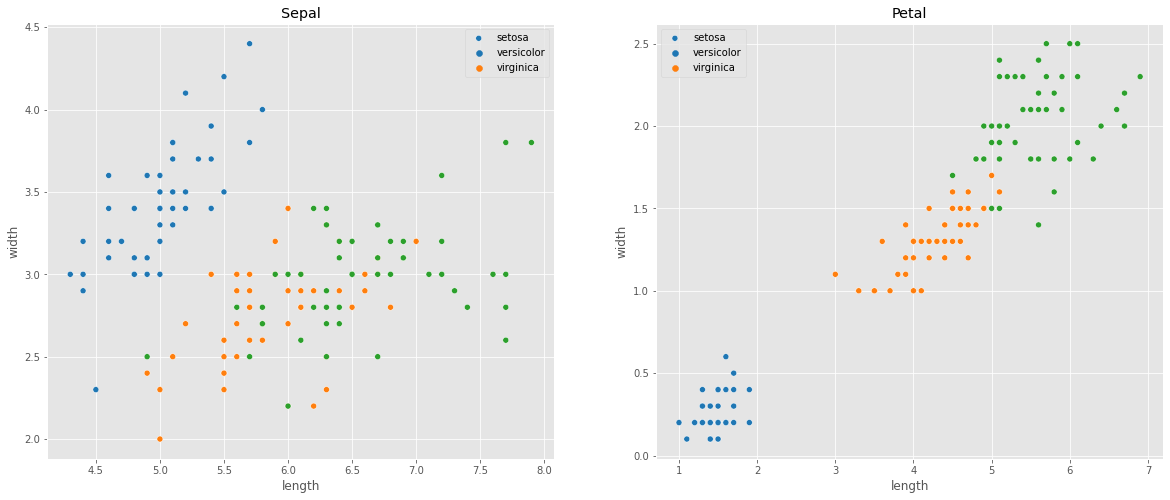

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

color = ['r', 'g', 'b']

sns.scatterplot(x = [iris[0] for iris in X], y = [iris[1] for iris in X],
                hue=Y, palette='tab10') # hue = Y (품종)
plt.title('Sepal')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(iris_class)

plt.subplot(1,2,2)
sns.scatterplot(x = [iris[2] for iris in X], y = [iris[3] for iris in X],
                hue=Y, palette='tab10') # hue = Y (품종)
plt.title('Petal')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(iris_class)
plt.show()

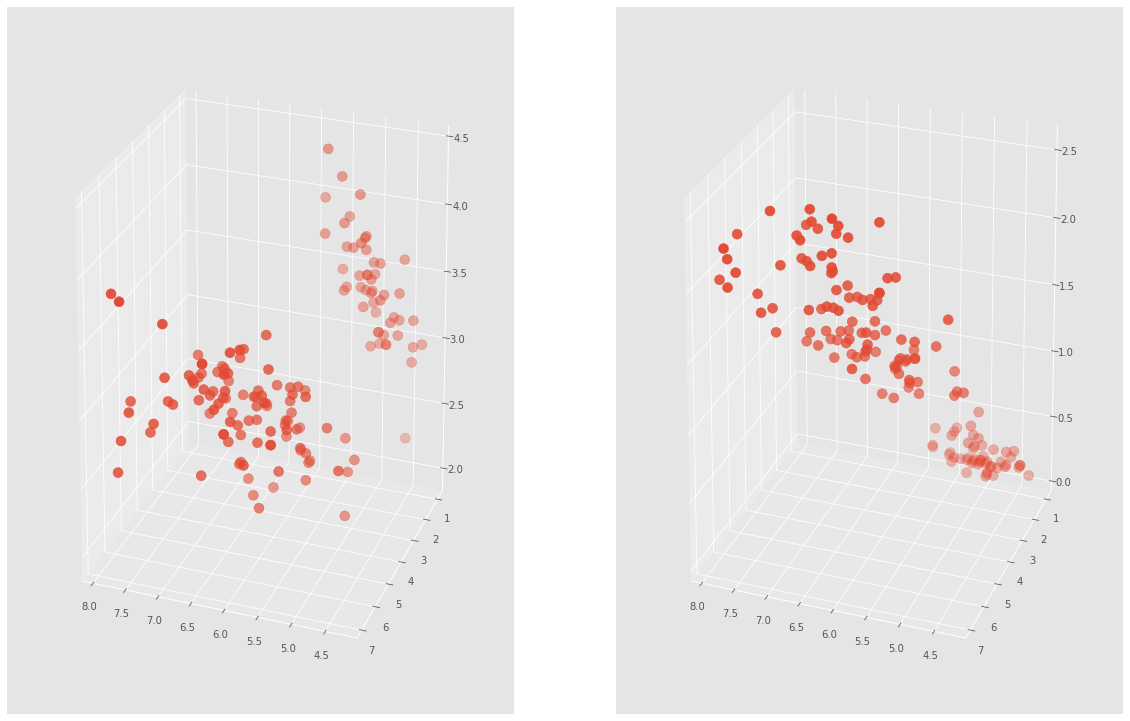

In [58]:
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(20,110)
ax.set_title('')
ax.scatter([iris[0] for iris in X], [iris[2] for iris in X], [iris[1] for iris in X], s=100) # A품종, A의 길이, A의 넓이

ax = fig.add_subplot(1,2,2, projection='3d')
ax.view_init(20,110)
ax.set_title('')
ax.scatter([iris[0] for iris in X], [iris[2] for iris in X], [iris[3] for iris in X], s=100) # A품종, A의 길이, A의 넓이

plt.show()

In [59]:
iris_column

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

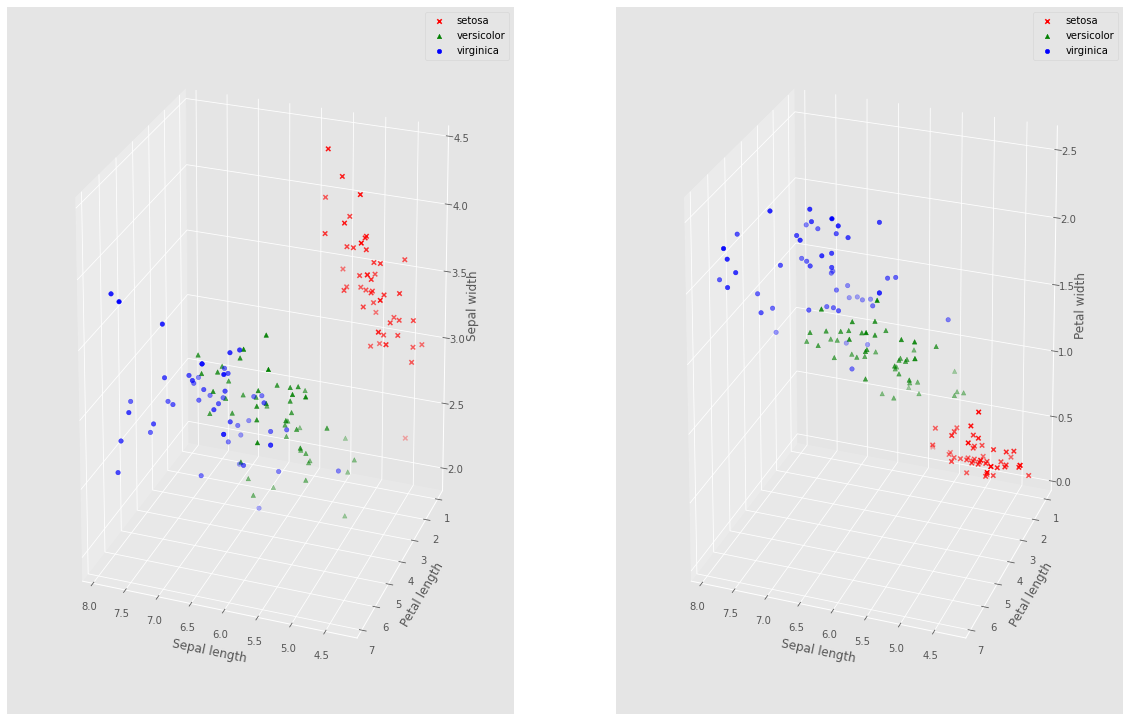

In [60]:
# setosa', 'versicolor', 'virginica
#   0           1             2


setosa = X[Y==0]
versicolor = X[Y==1]
virginica = X[Y==2]


fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(20,110)
ax.set_title('')

ax.scatter([iris[0] for iris in setosa], [iris[2] for iris in setosa], [iris[1] for iris in setosa],
           color='r', marker='x', label='setosa') # A품종, A의 꽃받침의 길이, A의 꽃받침의 너비
ax.scatter([iris[0] for iris in versicolor], [iris[2] for iris in versicolor], [iris[1] for iris in versicolor],
           color='g', marker='^', label='versicolor')
ax.scatter([iris[0] for iris in virginica], [iris[2] for iris in virginica], [iris[1] for iris in virginica],
           color='b', marker='o', label='virginica')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Sepal width')

plt.legend()


ax = fig.add_subplot(1,2,2, projection='3d')
ax.view_init(20,110)
ax.set_title('')
ax.scatter([iris[0] for iris in setosa], [iris[2] for iris in setosa], [iris[3] for iris in setosa],
           color='r', marker='x', label='setosa') # A품종, A의 꽃받침의 길이, A의 꽃잎의 너비
ax.scatter([iris[0] for iris in versicolor], [iris[2] for iris in versicolor], [iris[3] for iris in versicolor],
           color='g', marker='^', label='versicolor')
ax.scatter([iris[0] for iris in virginica], [iris[2] for iris in virginica], [iris[3] for iris in virginica],
           color='b', marker='o', label='virginica')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

plt.legend()
plt.show()

# **머신러닝**

In [61]:
df = pd.DataFrame(X, columns=iris_column)
df['species'] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 품종별 데이터 분류

In [62]:
import warnings
warnings.filterwarnings('ignore')

df['species2'] = 'setosa' # 초기설정
df[df.species == 1]['species2'] = 'versicolor'
df[df.species == 2]['species2'] = 'virginica'
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species2
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [63]:
# df.species.unique() --> setosa밖에 출력 안 됨

df.loc[df.species == 1, 'species2'] = 'versicolor'
df.loc[df.species == 2, 'species2'] = 'virginica'
df.species2.unique() # 본 의도대로 잘 출력됨

np.unique(df.species2, return_counts=True) # 각 샘플마다 50개의 특성이 담겨있음

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50]))

### 품종별 데이터 추출

In [64]:
setosa_df = df[df.species2 == 'setosa']
np.unique(setosa_df.species2, return_counts=True)

(array(['setosa'], dtype=object), array([50]))

In [65]:
versicolor_df = df[df.species2 == 'versicolor']
np.unique(versicolor_df.species2, return_counts=True)

(array(['versicolor'], dtype=object), array([50]))

In [66]:
virginica_df = df[df.species2 == 'virginica']
np.unique(virginica_df.species2, return_counts=True)

(array(['virginica'], dtype=object), array([50]))

## 품종별 상관관계 분석

In [67]:
setosa_y = setosa_df.iloc[:,3]
setosa_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.742547,0.267176
sepal width (cm),0.742547,1.000000,0.177700
petal length (cm),0.267176,0.177700,1.000000


In [68]:
setosa_x = setosa_df.iloc[:,:3]

In [69]:
versicolor_y = versicolor_df.iloc[:,3]
versicolor_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.525911,0.754049
sepal width (cm),0.525911,1.000000,0.560522
petal length (cm),0.754049,0.560522,1.000000


In [70]:
versicolor_x = versicolor_df.iloc[:,:3]

In [71]:
virginica_y = virginica_df.iloc[:,3]
virginica_df.iloc[:,:3].corr()

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,0.457228,0.864225
sepal width (cm),0.457228,1.000000,0.401045
petal length (cm),0.864225,0.401045,1.000000


In [72]:
virginica_x =  virginica_df.iloc[:,:3]

# virginica_x =  virginica_df.iloc[:,1:3] --> 2,3 (상관관계가 높은 컬럼을 제외하고 세번째, 네번째 컬럼만 남겨두기)

### 분석을 위해 선형 관계에 있는 컬럼들을 모아 학습하기
## **선형 회귀, 랜덤 포레스트**

### 선형 회귀 모델 학습 함수

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
def Linear_Regressor(x, y):
  # 데이터 분류
  ss = StandardScaler()
  x = ss.fit_transform(x)

  x_train, x_target, y_train, y_target = train_test_split(x, y, test_size=0.2, random_state=42)

  # 모델 학습
  lr = LinearRegression()
  lr.fit(np.array(x_train), y_train)
  return lr.score(np.array(x_target), y_target)

# Warning 발생 --> 넘파이 배열로 사용 권장
# 선형 회귀는 feature_name을 포함하지 않는 것이 좋으므로,
# 넘파이 배열로 바꾸어 컬럼명이 사라지도록 해 준 것

In [75]:
x = setosa_x
y = setosa_y
print(Linear_Regressor(x,y))

x = versicolor_x
y = versicolor_y
print(Linear_Regressor(x,y))

x = virginica_x
y = virginica_y
print(Linear_Regressor(x,y))

-0.0182394187295134
0.1308160704494692
0.18868351924254856


In [96]:
def RFR_Regressor(x,y):
  # ss = StandardScaler()
  # x = ss.fit_transform(x)

  x_train, x_target, y_train, y_target = train_test_split(x, y, test_size=0.2, random_state=10) # random_state값을 조정하니 그나마 점수가 잘 나옴

  # 모델 학습
  rfr = RandomForestRegressor(n_estimators=100, max_depth=5, criterion='absolute_error') # 하이퍼 파라미터 역시 튜닝해야 함
                                                                                         # n_estimators 10~100
  rfr.fit(x_train, y_train)
  return rfr.score(x_target, y_target)

**StandardScaler 는 데이터의 범위가 클 때 사용하는 것이므로 무조건 사용한다고 다 좋은 것은 아님**

In [97]:
x = setosa_x
y = setosa_y
print(RFR_Regressor(x,y))

x = versicolor_x
y = versicolor_y
print(RFR_Regressor(x,y))

x = virginica_x
y = virginica_y
print(RFR_Regressor(x,y))

0.1695039999999992
0.5346186094069523
0.11488247863247969


In [78]:
from sklearn.linear_model import LogisticRegression

def Logistic_Regressor(x,y):    
  ss = StandardScaler()
  x =  ss.fit_transform(x) 
  
  x_train,x_target,y_train,y_target =  train_test_split(x,y,test_size=0.2, random_state=20)        

  model =  LogisticRegression()
  model.fit(x_train,[int(i) for i in y_train])
  return model.score(x_target,[int(i) for i in y_target])

y값을 4번째 컬럼(petal width (cm)으로 두고 훈련하려 했으나, label 에러 발생

y값이 실수의 형태이기 떄문에 라벨이 연속적이지 않다는 점에서 에러가 발생한 것이므로 범주형 데이터로 변환해야만 가능하다.

단, int로 정수화 하면 모두 0이 되기 때문에 클래스가 하나 뿐인 y값이 되므로 이 또한 에러가 발생하게 된다.

In [80]:
x = setosa_x
y = setosa_y
y = np.array(y)*10
print(f"setosa's score : {Logistic_Regressor(x,y)}")

x = versicolor_x
y = versicolor_y
y = np.array(y)*10
print(f"versicolor's score : {Logistic_Regressor(x,y)}")

x = virginica_x
y = virginica_y
y = np.array(y)*10
print(f"virginica's score : {Logistic_Regressor(x,y)}")

setosa's score : 0.7
versicolor's score : 0.3
virginica's score : 0.1


Linear Regressor에 비해 상대적으로 성능이 매우 좋음

In [ ]:
x = virginica_x
y = virginica_y

ss = StandardScaler()
x =  ss.fit_transform(x) 

x_train, x_target, y_train, y_target =  train_test_split(x, y, test_size=0.2, random_state=42)        

model =  LogisticRegression()

model.fit(x_train, [int(i) for i in y_train])
model.score(x_target,[int(i) for i in y_target])